Data Preparation and Cleaning

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# import the train dataset
NBA_train = pd.read_csv('../data/raw/NBA_train.csv')

Exploratory Data Analysis

In [110]:
pd.set_option('display.max_columns', None)
NBA_train.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
5,3804,88,20.0,8.8,3.7,8.7,43.6,-0.2,-0.5,6.9,2.0,2.8,75.1,1.8,2.9,4.7,1.8,0.4,0.3,1.1,1
6,3805,70,20.6,7.0,3.2,5.4,58.9,0.1,-0.1,-3.6,0.7,1.4,56.7,2.9,4.6,7.6,0.6,0.4,0.7,1.2,1
7,3806,57,17.6,5.4,1.7,4.7,37.2,0.9,2.8,33.2,1.4,1.8,78.3,0.8,1.7,2.6,0.4,0.6,0.6,0.3,1
8,3807,46,26.5,9.3,3.1,7.2,44.0,0.6,1.7,27.5,2.0,2.3,82.1,1.3,2.8,4.1,1.8,0.7,0.6,1.7,1
9,3808,64,33.4,16.9,6.4,11.3,59.0,0.3,1.1,-13.0,3.7,4.9,74.9,3.4,8.0,11.9,0.8,0.4,2.5,2.4,1


In [111]:
NBA_train.tail(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
7990,11789,63,10.6,4.8,1.8,3.2,54.6,-0.3,-0.8,-12.3,1.3,1.7,81.9,2.3,2.2,4.0,0.0,0.3,0.4,0.3,1
7991,11790,60,18.3,8.9,3.8,7.5,48.4,-0.2,-0.5,-6.4,1.5,2.3,62.8,3.4,3.1,6.4,0.2,0.3,0.6,0.7,1
7992,11791,45,7.1,2.0,0.9,2.1,43.7,-0.2,-0.4,23.6,0.2,0.5,50.8,0.5,1.0,1.6,0.1,0.2,0.3,0.3,1
7993,11792,27,11.4,3.3,1.2,3.4,38.5,0.7,2.1,19.3,0.6,0.9,69.2,0.3,1.2,1.5,0.6,0.5,0.1,0.7,1
7994,11793,65,22.2,6.9,2.8,6.9,40.5,0.5,1.5,36.6,0.8,1.1,62.6,0.2,1.0,1.1,2.8,0.6,0.1,1.3,0
7995,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1
7999,11798,49,19.2,4.8,1.7,5.1,32.6,0.7,2.4,41.3,0.8,1.3,70.1,0.1,1.1,1.2,3.5,0.9,-0.3,1.4,1


In [112]:
# general description of data
NBA_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,1.392525,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [113]:
NBA_train.shape

(8000, 21)

In [114]:
NBA_train.dtypes

Id               int64
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs      int64
dtype: object

In [115]:
NBA_train.isna().sum()

Id             0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [116]:
NBA_train.duplicated().sum()

0

In [117]:
# delete the Id column
NBA_train = NBA_train.drop(['Id'], axis=1)
NBA_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [118]:
# find out how many of each class there is for the target variable
NBA_train['TARGET_5Yrs'].value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

<Axes: >

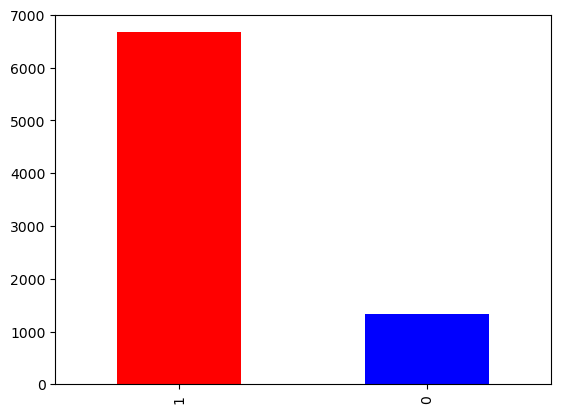

In [119]:
# visualize class distribution
NBA_train['TARGET_5Yrs'].value_counts().plot(kind='bar', color=['red', 'blue'])

Data Visualization

<Axes: ylabel='Frequency'>

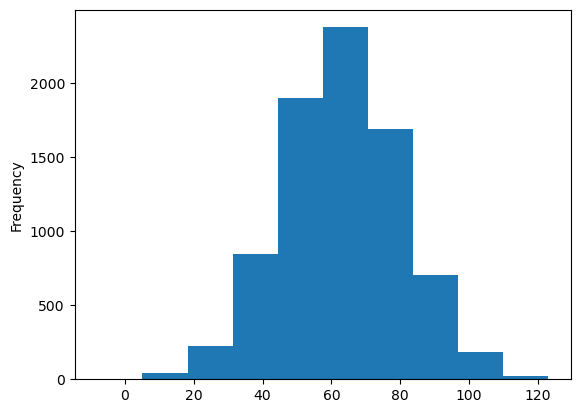

In [120]:
# GP distribution
NBA_train['GP'].plot(kind='hist')

<Axes: ylabel='Frequency'>

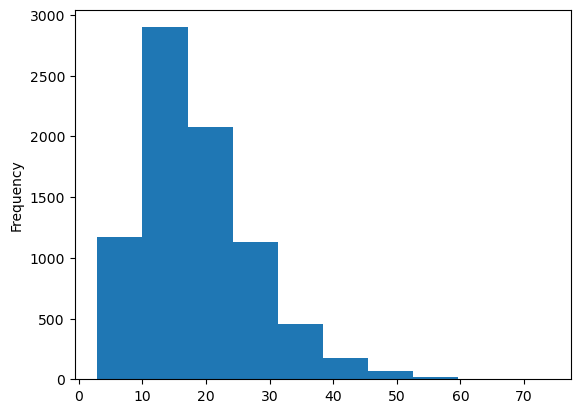

In [121]:
# MIN distribution
NBA_train['MIN'].plot(kind='hist')

<Axes: ylabel='Frequency'>

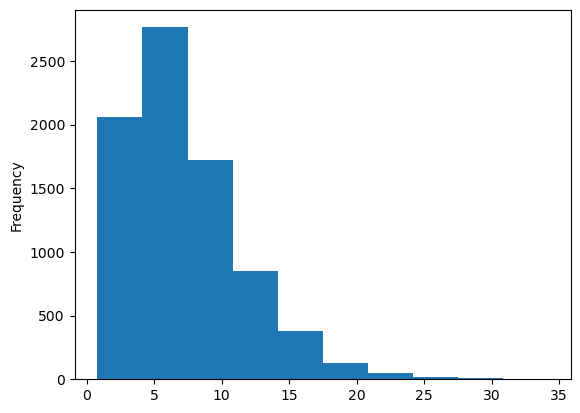

In [122]:
# PTS distribution
NBA_train['PTS'].plot(kind='hist')

<Axes: ylabel='Frequency'>

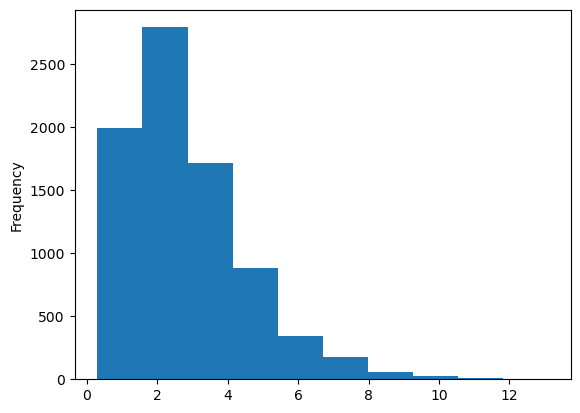

In [123]:
# FGM distribution
NBA_train['FGM'].plot(kind='hist')

<Axes: ylabel='Frequency'>

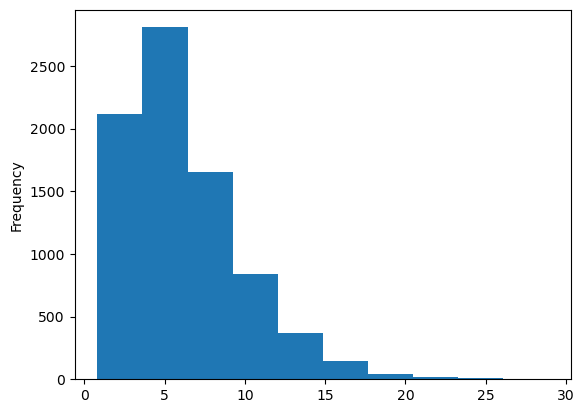

In [124]:
# FGA distribution
NBA_train['FGA'].plot(kind='hist')

<Axes: ylabel='Frequency'>

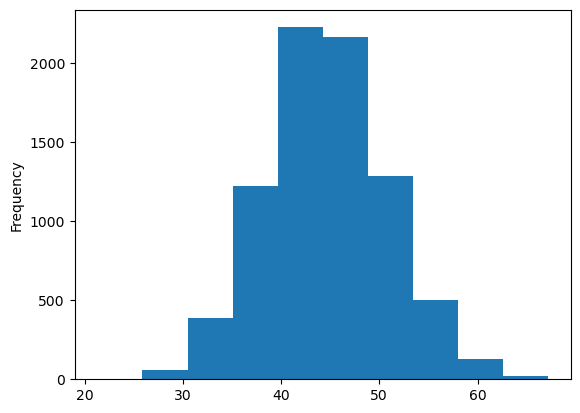

In [125]:
# FG% distribution
NBA_train['FG%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

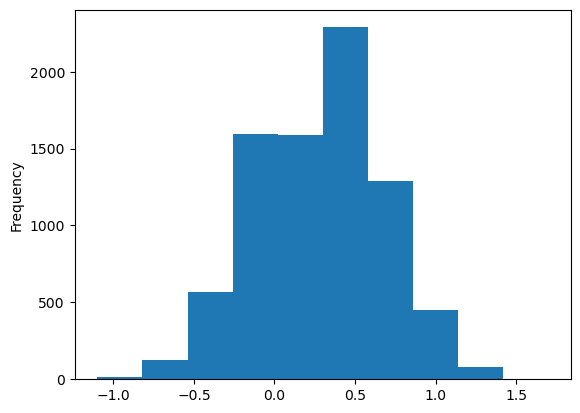

In [126]:
# 3P Made distribution
NBA_train['3P Made'].plot(kind='hist')

<Axes: ylabel='Frequency'>

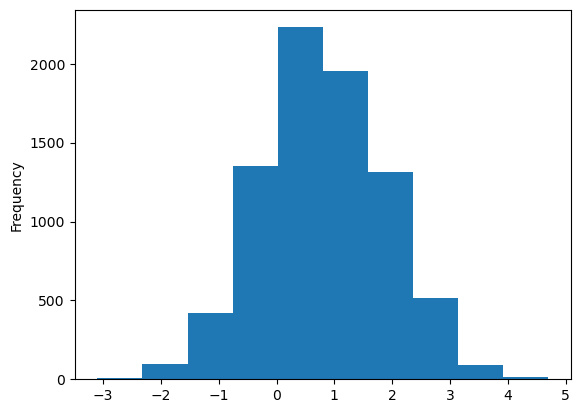

In [127]:
# 3PA distribution
NBA_train['3PA'].plot(kind='hist')

<Axes: ylabel='Frequency'>

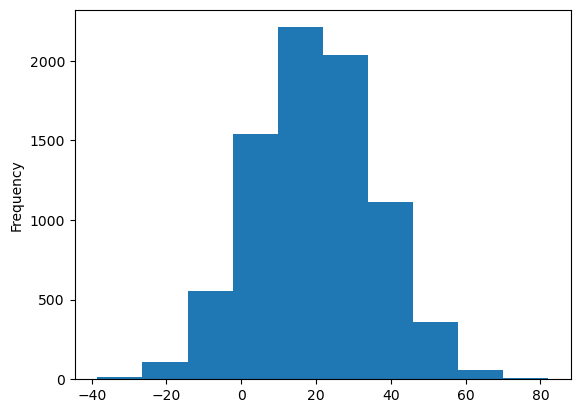

In [128]:
# 3P% distribution
NBA_train['3P%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

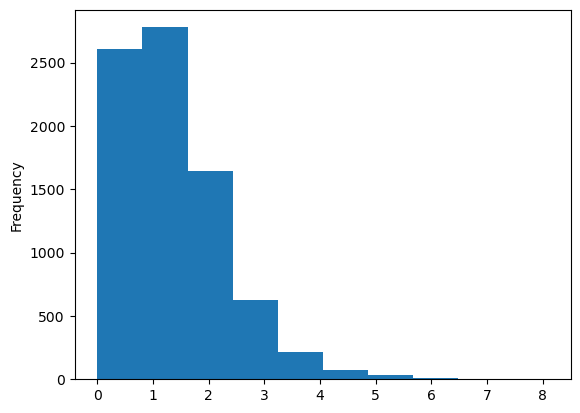

In [129]:
# FTM distribution
NBA_train['FTM'].plot(kind='hist')

<Axes: ylabel='Frequency'>

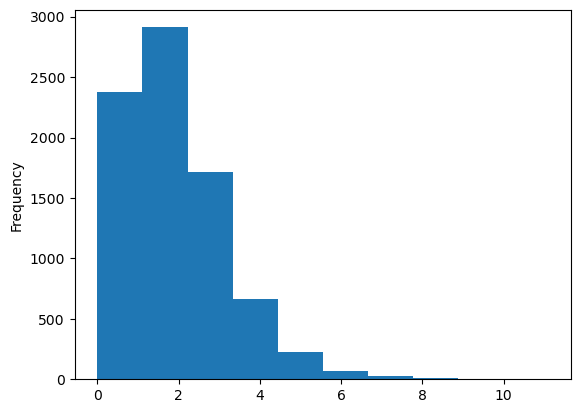

In [130]:
# FTA distribution
NBA_train['FTA'].plot(kind='hist')

<Axes: ylabel='Frequency'>

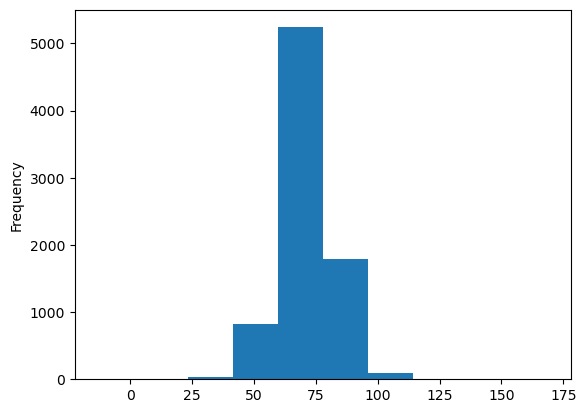

In [131]:
# FT% distribution
NBA_train['FT%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

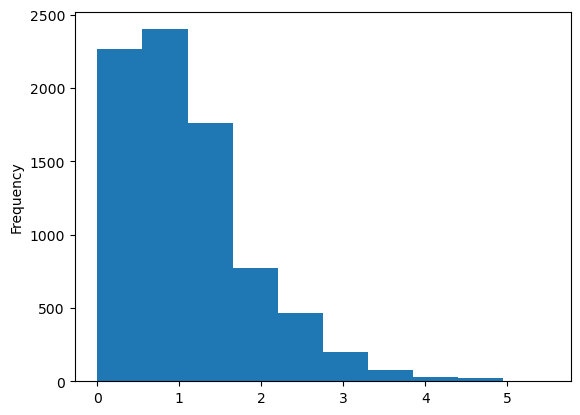

In [132]:
# OREB distribution
NBA_train['OREB'].plot(kind='hist')

<Axes: ylabel='Frequency'>

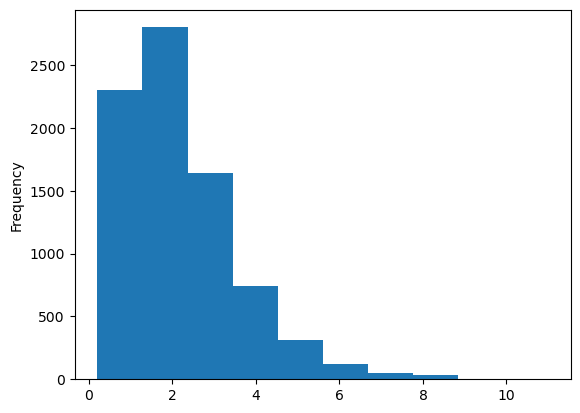

In [133]:
# DREB distribution
NBA_train['DREB'].plot(kind='hist')

<Axes: ylabel='Frequency'>

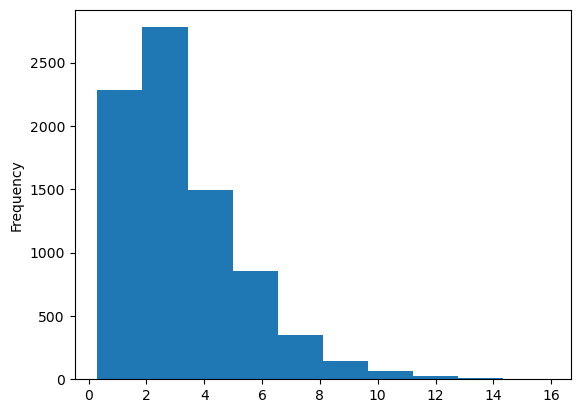

In [134]:
# REB distribution
NBA_train['REB'].plot(kind='hist')

<Axes: ylabel='Frequency'>

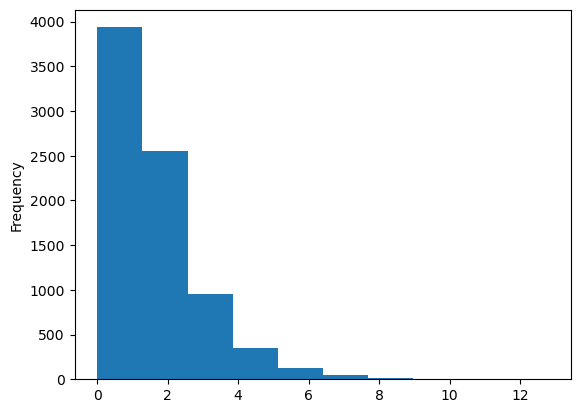

In [135]:
# AST distribution
NBA_train['AST'].plot(kind='hist')

<Axes: ylabel='Frequency'>

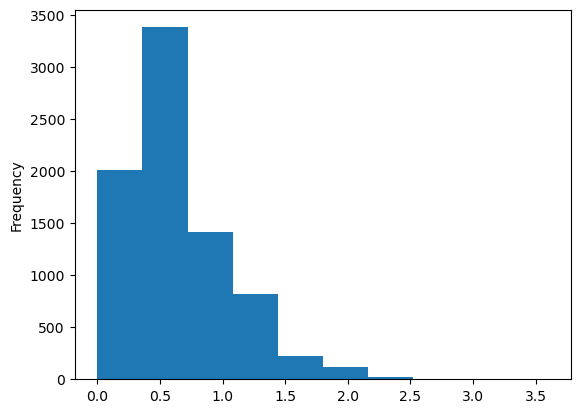

In [136]:
# STL distribution
NBA_train['STL'].plot(kind='hist')

<Axes: ylabel='Frequency'>

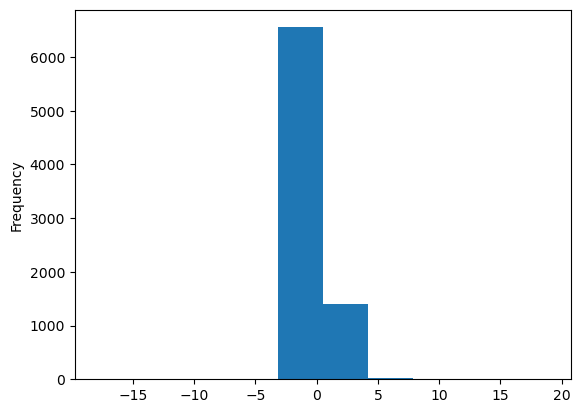

In [137]:
# BLK distribution
NBA_train['BLK'].plot(kind='hist')

<Axes: ylabel='Frequency'>

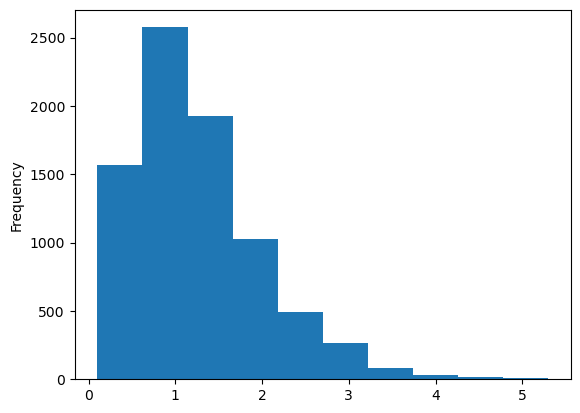

In [138]:
# TOV distribution
NBA_train['TOV'].plot(kind='hist')

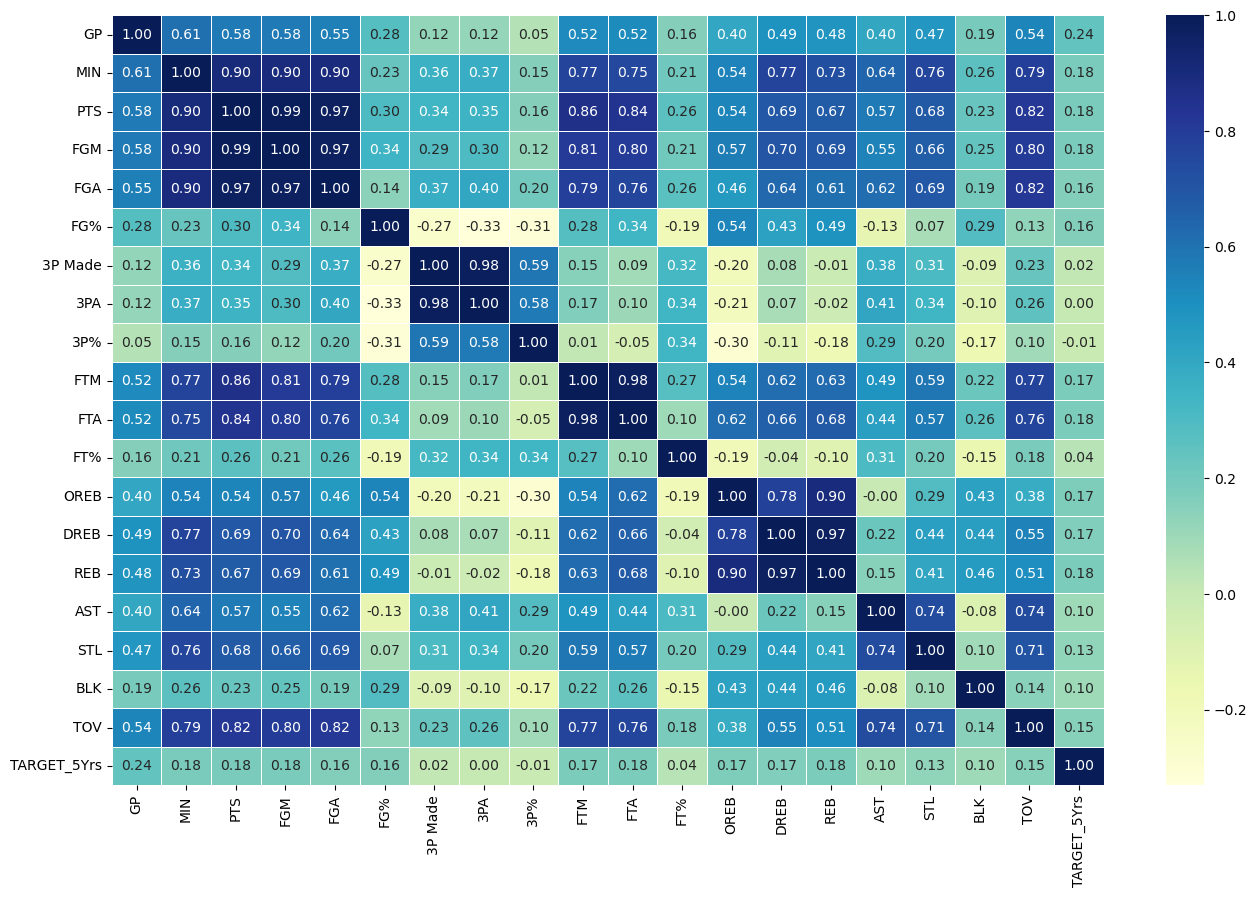

In [139]:
# correlation matrix
corr_matrix = NBA_train.corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [140]:
# Some columns in dataset contain negative values that needs to be cleaned, namely 3P Made, 3PA,  3P%, BLK
# Define a function to replace negative numbers with zero
def replace_negatives(x):
    if x < 0:
        return 0
    else:
        return x

# Apply the function to every element of the data frame
NBA_train = NBA_train.applymap(replace_negatives)

# Print the modified data frame
print(NBA_train)

      GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     80  24.3   7.8  3.0  6.4  45.7      0.1  0.3  22.6  2.0  2.9  72.1   
1     75  21.8  10.5  4.2  7.9  55.1      0.0  0.0  34.9  2.4  3.6  67.8   
2     85  19.1   4.5  1.9  4.5  42.8      0.4  1.2  34.3  0.4  0.6  75.7   
3     63  19.1   8.2  3.5  6.7  52.5      0.3  0.8  23.7  0.9  1.5  66.9   
4     63  17.8   3.7  1.7  3.4  50.8      0.5  1.4  13.7  0.2  0.5  54.0   
...   ..   ...   ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   
7995  32   9.2   1.8  0.7  1.8  40.3      0.0  0.0  23.1  0.4  0.6  65.7   
7996  54   6.0   1.8  0.7  1.4  48.7      0.1  0.1   3.1  0.2  0.4  70.1   
7997  85  28.2  10.7  4.0  9.0  45.1      0.2  0.6  23.6  2.8  3.9  69.7   
7998  39   7.7   2.5  1.0  2.3  40.1      0.0  0.0  13.3  0.6  0.7  74.3   
7999  49  19.2   4.8  1.7  5.1  32.6      0.7  2.4  41.3  0.8  1.3  70.1   

      OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0      2.2   2.0  3.8  3.2  1.

Explore Test Dataset

In [141]:
# import and explore the train dataset
NBA_test = pd.read_csv('../data/raw/NBA_test.csv') 
NBA_test.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
5,5,59,16.1,7.1,2.8,4.5,62.0,-0.1,-0.6,3.4,1.7,2.7,58.6,1.8,2.6,4.6,0.6,0.6,0.4,0.9
6,6,45,8.3,3.2,1.4,2.8,46.4,-0.5,-1.6,8.9,0.5,0.7,69.3,0.5,0.5,1.2,0.2,0.1,0.2,0.4
7,7,53,12.1,4.7,1.8,4.1,44.1,0.1,0.2,25.7,0.9,1.0,80.2,0.6,1.1,1.6,0.8,0.4,-0.2,0.6
8,8,41,21.6,7.9,3.1,6.0,49.6,0.3,0.9,-14.8,1.8,2.2,77.6,2.4,2.6,5.1,1.4,0.5,0.4,1.4
9,9,25,10.0,2.6,1.0,2.3,45.0,0.2,0.7,11.7,0.4,0.5,84.1,0.4,1.5,1.8,0.4,0.2,0.2,0.5


In [142]:
NBA_test.tail(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
3789,3789,60,11.7,7.2,3.2,5.7,56.1,-0.1,-0.4,8.1,0.8,1.2,77.1,0.7,1.2,1.9,0.5,0.5,0.2,1.0
3790,3790,68,16.3,3.2,1.3,3.2,37.9,0.3,1.0,19.5,0.5,0.4,85.6,0.9,1.6,2.7,1.2,0.4,0.1,0.5
3791,3791,54,7.5,2.6,0.9,2.2,40.4,0.5,1.5,42.1,0.6,0.8,76.8,0.2,0.5,0.7,0.7,0.4,-0.1,0.5
3792,3792,36,15.8,5.0,2.1,5.7,36.5,0.0,0.6,14.8,0.8,1.2,68.9,1.2,2.8,4.1,1.1,0.6,0.2,0.9
3793,3793,42,14.1,4.2,1.8,4.3,41.8,0.4,1.0,33.9,0.7,1.2,68.0,0.8,1.5,2.4,1.0,0.7,0.1,0.8
3794,3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,3795,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,3796,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4
3798,3798,55,12.0,3.0,1.1,2.5,42.3,0.1,0.6,11.7,0.9,1.1,76.7,0.7,2.0,2.6,0.6,0.3,0.2,1.2


In [143]:
NBA_test.shape

(3799, 20)

In [144]:
NBA_test.isna().sum()

Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

In [145]:
NBA_test.duplicated().sum()

0

In [146]:
# delete the Id column
NBA_test = NBA_test.drop(['Id'], axis=1)
NBA_test

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [147]:
# Apply the function that replaces negative values with zero to every to the elements in test data set
NBA_test = NBA_test.applymap(replace_negatives)
print(NBA_test)

      GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     56   9.1   4.0  1.6   3.7  43.7      0.1  0.3   7.3  0.7  1.2  63.4   
1     43  19.3  10.1  3.7   8.1  46.0      0.6  1.7  35.1  1.8  2.5  75.3   
2     82  33.9  11.3  4.9  10.6  45.6      0.5  1.9  44.8  1.8  2.7  71.2   
3     86  44.7  18.8  6.8  15.9  42.9      0.5  1.8  13.5  4.5  6.3  70.9   
4     58  12.3   4.7  1.6   4.0  40.0      0.5  1.7  38.7  1.1  1.3  76.9   
...   ..   ...   ...  ...   ...   ...      ...  ...   ...  ...  ...   ...   
3794  84  21.2   8.7  3.4   6.7  50.2      0.0  0.0   0.0  1.7  2.5  68.1   
3795  49  16.3   6.4  2.9   6.6  44.4      0.0  0.0  19.8  1.0  1.9  50.2   
3796  53   9.9   2.1  0.8   1.8  43.1      0.0  0.0   1.9  0.6  1.0  63.9   
3797  89  38.3  14.5  5.4  11.8  45.2      0.5  1.2  24.7  2.5  2.9  89.2   
3798  55  12.0   3.0  1.1   2.5  42.3      0.1  0.6  11.7  0.9  1.1  76.7   

      OREB  DREB  REB  AST  STL  BLK  TOV  
0      1.2   0.8  1.7  0.4  0.2